# **Load data set**

In [26]:
import pandas as pd


data = pd.read_csv("https://raw.githubusercontent.com/vihanga-induwara/CM2604-CW-Bank-Marketing/refs/heads/main/bank%2Bmarketing/bank-additional/bank-additional/bank-additional-full.csv", sep=";")


In [27]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
# Check column names and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [29]:
# Check for missing values
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [30]:
# Summary statistics
print(data.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

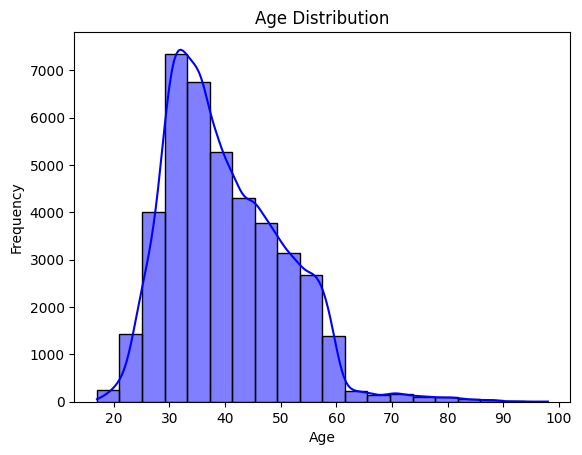

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
sns.histplot(data['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-32-1dfeb1f79179>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='pastel')


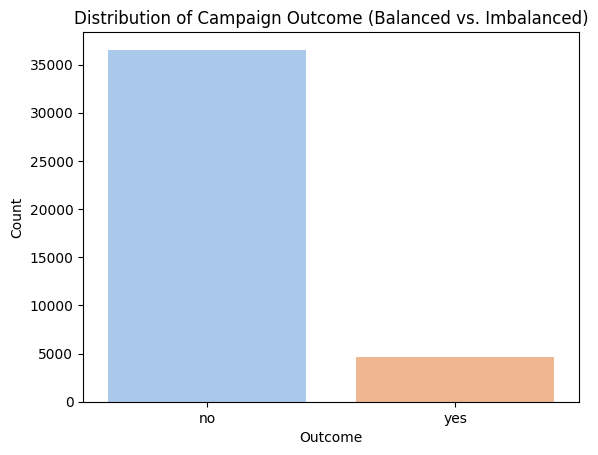

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for target variable
sns.countplot(x='y', data=data, palette='pastel')
plt.title('Distribution of Campaign Outcome (Balanced vs. Imbalanced)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


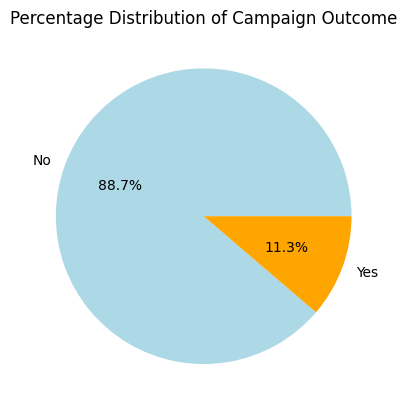

In [33]:
# Calculate percentage distribution
outcome_counts = data['y'].value_counts(normalize=True) * 100
print(outcome_counts)

# Visualize as a pie chart
outcome_counts.plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'], colors=['lightblue', 'orange'])
plt.title('Percentage Distribution of Campaign Outcome')
plt.ylabel('')  # Remove y-axis label
plt.show()


# **Preprocess Data**

In [61]:

# Display column details: type and number of unique categories
for column in data.columns:
    print(f"Column: {column}")
    print(f"Type: {data[column].dtype}")
    print(f"Number of unique values: {data[column].nunique()}")

    # If the column is categorical, print the unique values (categories)
    if data[column].dtype == 'object':
        print(f"Categories: {data[column].unique()}")
    print("-" * 40)


Column: age
Type: int64
Number of unique values: 78
----------------------------------------
Column: job
Type: object
Number of unique values: 12
Categories: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------------------
Column: marital
Type: object
Number of unique values: 4
Categories: ['married' 'single' 'divorced' 'unknown']
----------------------------------------
Column: education
Type: object
Number of unique values: 8
Categories: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------------------
Column: default
Type: object
Number of unique values: 3
Categories: ['no' 'unknown' 'yes']
----------------------------------------
Column: housing
Type: object
Number of unique values: 3
Categories: ['no' 'yes' 'unknown']
----------------------------------------
Column: lo

age

In [34]:
data["age"].dtype
data["age"].nunique()
data["age"].unique()
data["age"].value_counts()

,count
age,
31,1947
32,1846
33,1833
36,1780
35,1759
...,...
89,2
91,2
94,1


In [35]:
data["age"].describe()

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


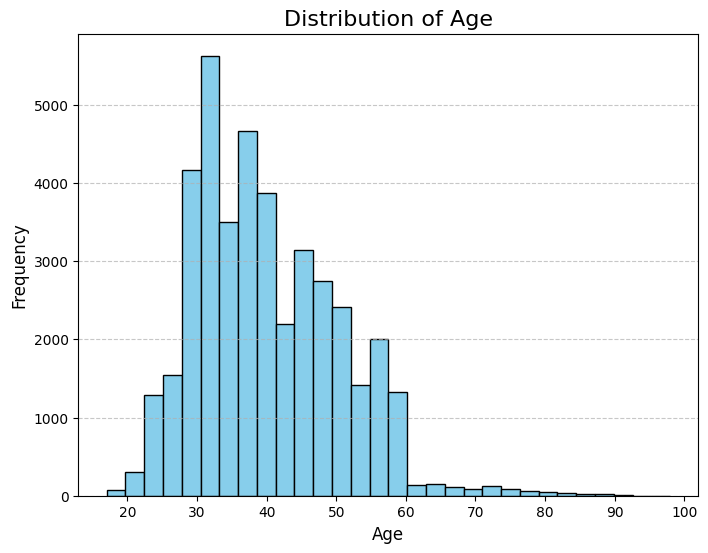

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data["age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [43]:
import pandas as pd

# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Filter the data to exclude outliers
data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

# Print the shape of the dataset before and after removing outliers
print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers: {data_no_outliers.shape}")


Lower Bound: 9.5, Upper Bound: 69.5
Original data shape: (40719, 21)
Data shape after removing outliers: (40719, 21)


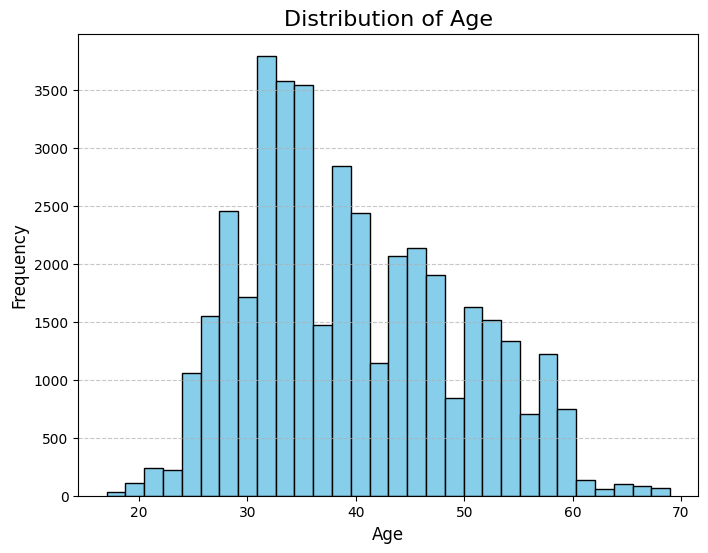

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data["age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [51]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler instance
scaler = MinMaxScaler()

# Normalize the 'age' column
data['age'] = scaler.fit_transform(data[['age']])

# Display the first few rows of the normalized column
print(data[['age']].head())


        age
0  0.750000
1  0.769231
2  0.384615
3  0.442308
4  0.750000


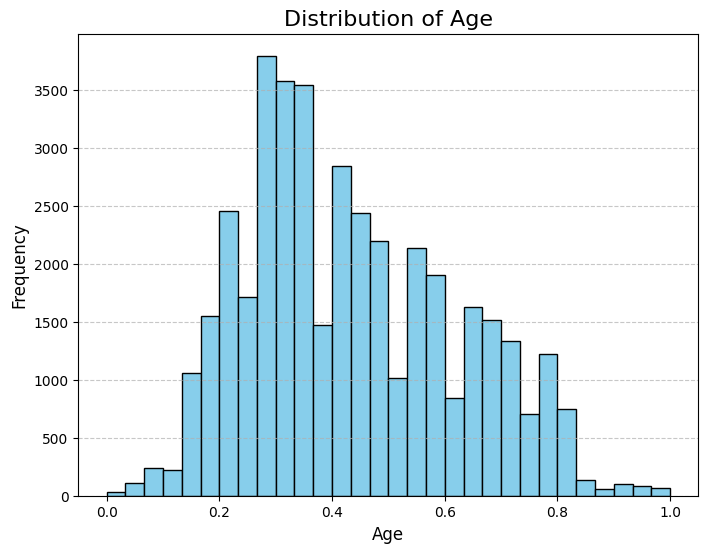

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data["age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


job


In [46]:
data["job"].dtype
data["job"].nunique()
data["job"].unique()
data["job"].value_counts()

,count
job,
admin.,10414
blue-collar,9251
technician,6742
services,3969
management,2918
entrepreneur,1456
self-employed,1420
retired,1301
housemaid,1035


In [47]:
data["job"].describe()

,job
count,40719
unique,12
top,admin.
freq,10414


In [53]:
# One-hot encoding for the 'job' column
job_encoded = pd.get_dummies(data['job'], prefix='job')

# Add the encoded columns to the original dataframe
data = pd.concat([data, job_encoded], axis=1)

# Display the first few rows of the updated dataframe
print(data.head())


        age        job  marital    education  default housing loan    contact  \
0  0.750000  housemaid  married     basic.4y       no      no   no  telephone   
1  0.769231   services  married  high.school  unknown      no   no  telephone   
2  0.384615   services  married  high.school       no     yes   no  telephone   
3  0.442308     admin.  married     basic.6y       no      no   no  telephone   
4  0.750000   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  job_entrepreneur  job_housemaid  job_management  \
0   may         mon  ...             False           True           False   
1   may         mon  ...             False          False           False   
2   may         mon  ...             False          False           False   
3   may         mon  ...             False          False           False   
4   may         mon  ...             False          False           False   

   job_retired job_self-employed  job_services  jo

marital


In [58]:
data["marital"].dtype
data["marital"].nunique()
data["marital"].unique()
data["marital"].value_counts()

,count
marital,
married,24610
single,11553
divorced,4476
unknown,80


In [61]:
# Replace unknown with the most frequent category
most_frequent_marital = data['marital'].mode()[0]
data['marital'].replace('unknown', most_frequent_marital, inplace=True)


<ipython-input-61-e089c0016540>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['marital'].replace('unknown', most_frequent_marital, inplace=True)


In [62]:
data["marital"].value_counts()

,count
marital,
married,24690
single,11553
divorced,4476


In [63]:
# One-hot encode the 'marital' column
data = pd.get_dummies(data, columns=['marital'], drop_first=False)

# Check the result
print(data.head())


        age        job    education  default housing loan    contact month  \
0  0.750000  housemaid     basic.4y       no      no   no  telephone   may   
1  0.769231   services  high.school  unknown      no   no  telephone   may   
2  0.384615   services  high.school       no     yes   no  telephone   may   
3  0.442308     admin.     basic.6y       no      no   no  telephone   may   
4  0.750000   services  high.school       no      no  yes  telephone   may   

  day_of_week  duration  ...  job_retired  job_self-employed  job_services  \
0         mon       261  ...        False              False         False   
1         mon       149  ...        False              False          True   
2         mon       226  ...        False              False          True   
3         mon       151  ...        False              False         False   
4         mon       307  ...        False              False          True   

  job_student  job_technician  job_unemployed  job_unknown  ma

education


In [65]:

data["education"].value_counts()

,count
education,
university.degree,12105
high.school,9481
basic.9y,6018
professional.course,5201
basic.4y,3935
basic.6y,2279
unknown,1683
illiterate,17


In [68]:
# Find the most frequent category in the 'education' column
most_frequent_education = data['education'].mode()[0]

# Replace 'illiterate' with the most frequent category
data['education'] = data['education'].replace('illiterate', most_frequent_education)




In [69]:
# Check the value counts after replacement
print(data['education'].value_counts())

education
university.degree      12122
high.school             9481
basic.9y                6018
professional.course     5201
basic.4y                3935
basic.6y                2279
unknown                 1683
Name: count, dtype: int64


default


In [70]:

data["default"].value_counts()

,count
default,
no,32162
unknown,8554
yes,3


In [71]:
# Drop the 'default' column if it doesn't provide useful information
data = data.drop('default', axis=1)

# Check the remaining columns
print(data.columns)


Index(['age', 'job', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'age_normalized', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single'],
      dtype='object')


housing


In [73]:

data["housing"].value_counts()

,count
housing,
yes,21319
no,18419
unknown,981


In [74]:
# Replace 'unknown' with the most frequent value ('yes')
data['housing'] = data['housing'].replace('unknown', 'yes')

# Check the updated value counts
print(data['housing'].value_counts())


housing
yes    22300
no     18419
Name: count, dtype: int64


In [75]:
# One-hot encode the 'housing' column
housing_encoded = pd.get_dummies(data['housing'], prefix='housing')

# Join the encoded columns back to the original dataframe
data = pd.concat([data, housing_encoded], axis=1)

# Drop the original 'housing' column if it's no longer needed
data = data.drop(columns=['housing'])

# Check the updated dataframe
print(data.head())


        age        job    education loan    contact month day_of_week  \
0  0.750000  housemaid     basic.4y   no  telephone   may         mon   
1  0.769231   services  high.school   no  telephone   may         mon   
2  0.384615   services  high.school   no  telephone   may         mon   
3  0.442308     admin.     basic.6y   no  telephone   may         mon   
4  0.750000   services  high.school  yes  telephone   may         mon   

   duration  campaign  pdays  ...  job_services job_student  job_technician  \
0       261         1    999  ...         False       False           False   
1       149         1    999  ...          True       False           False   
2       226         1    999  ...          True       False           False   
3       151         1    999  ...         False       False           False   
4       307         1    999  ...          True       False           False   

   job_unemployed  job_unknown  marital_divorced  marital_married  \
0           False

loan


In [76]:

data["loan"].value_counts()

,count
loan,
no,33560
yes,6178
unknown,981


In [77]:
# Replace 'unknown' with the most frequent value ('yes')
data['loan'] = data['loan'].replace('unknown', 'yes')

# Check the updated value counts
print(data['loan'].value_counts())


loan
no     33560
yes     7159
Name: count, dtype: int64


In [78]:
# One-hot encode the 'loan' column
loan_encoded = pd.get_dummies(data['loan'], prefix='loan')

# Join the encoded columns back to the original dataframe
data = pd.concat([data, loan_encoded], axis=1)

# Drop the original 'loan' column if it's no longer needed
data = data.drop(columns=['loan'])

# Check the updated dataframe
print(data.head())


        age        job    education    contact month day_of_week  duration  \
0  0.750000  housemaid     basic.4y  telephone   may         mon       261   
1  0.769231   services  high.school  telephone   may         mon       149   
2  0.384615   services  high.school  telephone   may         mon       226   
3  0.442308     admin.     basic.6y  telephone   may         mon       151   
4  0.750000   services  high.school  telephone   may         mon       307   

   campaign  pdays  previous  ... job_technician  job_unemployed  job_unknown  \
0         1    999         0  ...          False           False        False   
1         1    999         0  ...          False           False        False   
2         1    999         0  ...          False           False        False   
3         1    999         0  ...          False           False        False   
4         1    999         0  ...          False           False        False   

   marital_divorced  marital_married  marita

contact


In [79]:

data["contact"].value_counts()

,count
contact,
cellular,25724
telephone,14995


In [80]:
# Drop the 'contact' column
data = data.drop(columns=['contact'])

# Check the updated dataframe
print(data.head())


        age        job    education month day_of_week  duration  campaign  \
0  0.750000  housemaid     basic.4y   may         mon       261         1   
1  0.769231   services  high.school   may         mon       149         1   
2  0.384615   services  high.school   may         mon       226         1   
3  0.442308     admin.     basic.6y   may         mon       151         1   
4  0.750000   services  high.school   may         mon       307         1   

   pdays  previous     poutcome  ...  job_technician  job_unemployed  \
0    999         0  nonexistent  ...           False           False   
1    999         0  nonexistent  ...           False           False   
2    999         0  nonexistent  ...           False           False   
3    999         0  nonexistent  ...           False           False   
4    999         0  nonexistent  ...           False           False   

   job_unknown  marital_divorced  marital_married marital_single  housing_no  \
0        False          

month


In [81]:

data["month"].value_counts()

,count
month,
may,13736
jul,7141
aug,6091
jun,5301
nov,4064
apr,2562
oct,648
sep,513
mar,503


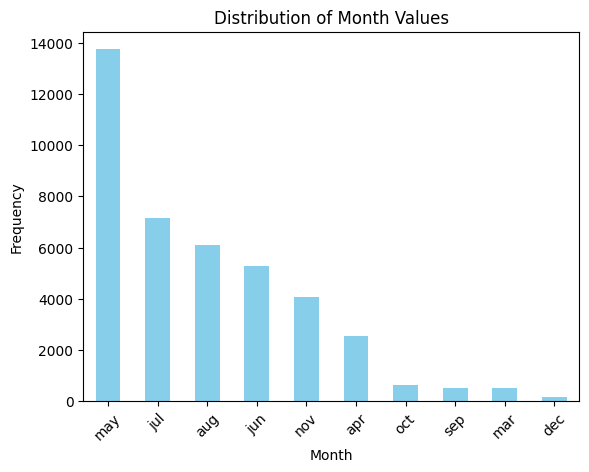

In [82]:
import matplotlib.pyplot as plt

# Plot the value counts of the 'month' column
data['month'].value_counts().plot(kind='bar', color='skyblue')

# Set labels and title
plt.title('Distribution of Month Values')
plt.xlabel('Month')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=45)
plt.show()


In [83]:
# One-hot encode the 'month' column
data_encoded = pd.get_dummies(data, columns=['month'], drop_first=False)

# Check the result
print(data_encoded.head())

        age        job    education day_of_week  duration  campaign  pdays  \
0  0.750000  housemaid     basic.4y         mon       261         1    999   
1  0.769231   services  high.school         mon       149         1    999   
2  0.384615   services  high.school         mon       226         1    999   
3  0.442308     admin.     basic.6y         mon       151         1    999   
4  0.750000   services  high.school         mon       307         1    999   

   previous     poutcome  emp.var.rate  ...  month_apr  month_aug  month_dec  \
0         0  nonexistent           1.1  ...      False      False      False   
1         0  nonexistent           1.1  ...      False      False      False   
2         0  nonexistent           1.1  ...      False      False      False   
3         0  nonexistent           1.1  ...      False      False      False   
4         0  nonexistent           1.1  ...      False      False      False   

   month_jul month_jun  month_mar  month_may  mont

day_of_week


In [84]:

data["day_of_week"].value_counts()

,count
day_of_week,
thu,8522
mon,8426
wed,8052
tue,7980
fri,7739


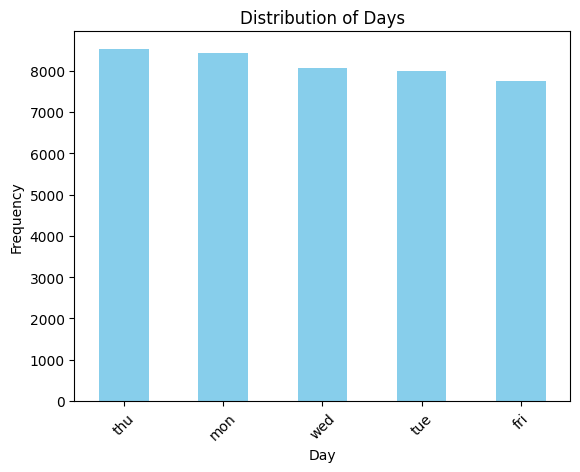

In [85]:
import matplotlib.pyplot as plt

# Plot the value counts of the 'day_of_week' column
data['day_of_week'].value_counts().plot(kind='bar', color='skyblue')

# Set labels and title
plt.title('Distribution of Days')
plt.xlabel('Day')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=45)
plt.show()


In [86]:
# One-hot encode the 'day_of_week' column
data_encoded = pd.get_dummies(data, columns=['day_of_week'], drop_first=False)

# Check the result
print(data_encoded.head())


        age        job    education month  duration  campaign  pdays  \
0  0.750000  housemaid     basic.4y   may       261         1    999   
1  0.769231   services  high.school   may       149         1    999   
2  0.384615   services  high.school   may       226         1    999   
3  0.442308     admin.     basic.6y   may       151         1    999   
4  0.750000   services  high.school   may       307         1    999   

   previous     poutcome  emp.var.rate  ...  marital_single  housing_no  \
0         0  nonexistent           1.1  ...           False        True   
1         0  nonexistent           1.1  ...           False        True   
2         0  nonexistent           1.1  ...           False       False   
3         0  nonexistent           1.1  ...           False        True   
4         0  nonexistent           1.1  ...           False        True   

   housing_yes  loan_no loan_yes  day_of_week_fri  day_of_week_mon  \
0        False     True    False            Fa

duration

In [87]:

data["duration"].value_counts()

,count
duration,
85,168
136,167
90,167
73,166
124,163
...,...
1275,1
1473,1
1432,1


campaign


In [ ]:

data["education"].value_counts()

pdays

In [ ]:

data["education"].value_counts()

previous


In [ ]:

data["education"].value_counts()

poutcome


In [ ]:

data["education"].value_counts()

emp.var.rate


In [ ]:

data["education"].value_counts()

cons.price.idx

In [ ]:

data["education"].value_counts()

cons.conf.idx


In [ ]:

data["education"].value_counts()

euribor3m


In [ ]:

data["education"].value_counts()

nr.employed

In [ ]:

data["education"].value_counts()

# **Feature Engineering**

# **Train Model**

# **Evaluate the Model**

# **Optimize the Model**

# **Evaluate the Model**

# **Deploy the Mode**